Module 5- Deep Computer Vision- Convolutional Neural Networks (CNN)
Installation

    If you want to run your code on Google Colab, there is no installation required. (recommended for the course)
    If you want to run your code locally, then you need to install tensorflow https://www.tensorflow.org/install



In [1]:
import tensorflow
tensorflow.__version__

'2.11.0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the data

In this notebook, we will be working with mnist data set: https://en.wikipedia.org/wiki/MNIST_database

    60,000 train images
    10,000 test images
    image size (28,28)


In [3]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

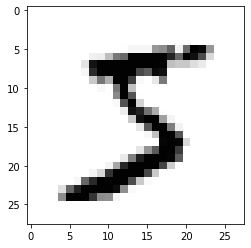

In [7]:
plt.imshow(X_train[0],cmap='Greys')
plt.show()

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Convolutional Neural Networks (CNN)

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
# reshaping

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train=X_train.reshape((60000,28,28,1))
X_train=X_train/255
X_test=X_test.reshape((10000,28,28,1))
X_test=X_test/255

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_test.shape

(10000, 28, 28, 1)

Creating a CNN model:

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
# we will be using functional api

def CNN_builder():
    inputs= keras.Input(shape=(28,28,1), name='Input layer')
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(inputs)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)
    x = layers.Dense(units= 64, activation='relu')(x)
    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs= inputs , outputs=outputs, name='my_first_CNN_model')
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

       
    return model

In [17]:
model=CNN_builder()
model.summary()


Model: "my_first_CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 3, 128)         73856     
                                                                 
 flattening_layer (Flatten)  (None, 1152)       

In [20]:
# params
1*(3*3)*32+32
       

320

In [21]:
32*(3*3)*64+64

18496

In [22]:
64*(3*3)*128+128

73856

In [23]:
3*3*128

1152

In [24]:
1152*64+64

73792

In [25]:
1152*10+10

11530

output shape:

    channels are the number of filters
    output size = floor(ninput+2p−fs+1)
    each pooling will half the width and height

In [26]:
# for example, the output shape of conv_layer 1 is (None, 26,26, 32) 
np.floor(((28+0-3)/1)+1)

26.0

Model fit

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint
modelcheckpoint =ModelCheckpoint(filepath='first_CNN.h5',save_best_only=True,monitor='val_loss')

In [30]:
history=model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),
                  epochs=10,batch_size=64,callbacks=[modelcheckpoint])

Epoch 1/10
938/938 [==============================] - 15s 5ms/step - loss: 0.1638 - accuracy: 0.9487 - val_loss: 0.0390 - val_accuracy: 0.9873
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0436 - accuracy: 0.9868 - val_loss: 0.0419 - val_accuracy: 0.9863
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0277 - val_accuracy: 0.9916
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0226 - accuracy: 0.9932 - val_loss: 0.0432 - val_accuracy: 0.9866
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0175 - accuracy: 0.9948 - val_loss: 0.0241 - val_accuracy: 0.9918
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.0301 - val_accuracy: 0.9912
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.0377 - val_accuracy: 0.9910
Epoch

In [32]:
test_model=keras.models.load_model('first_CNN.h5')
test_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0241 - accuracy: 0.9918


[0.024093758314847946, 0.9918000102043152]

As you can see, this simple CNN performs really well in the test set with +99% accuracy

In [33]:
Model evaluation

SyntaxError: ignored

In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
metrics=pd.DataFrame(history.history)

In [36]:
metrics.head

<bound method NDFrame.head of        loss  accuracy  val_loss  val_accuracy
0  0.163836  0.948717  0.039027        0.9873
1  0.043575  0.986767  0.041885        0.9863
2  0.030567  0.990600  0.027718        0.9916
3  0.022617  0.993217  0.043203        0.9866
4  0.017508  0.994783  0.024094        0.9918
5  0.013459  0.995683  0.030112        0.9912
6  0.010564  0.996700  0.037736        0.9910
7  0.009476  0.997183  0.031657        0.9933
8  0.007017  0.997900  0.040654        0.9915
9  0.006364  0.998067  0.034311        0.9923>

NameError: ignored

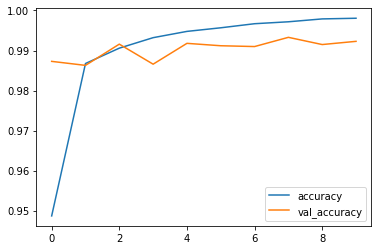

In [37]:
metrics[['accuracy','val_accuracy']].plot()
plot.show()

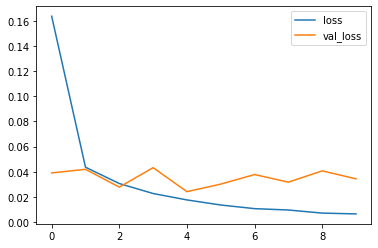

In [38]:
metrics[['loss','val_loss']].plot()
plt.show()

In [39]:
predictions_prob=model.predict(X_test)
predictions_prob[0]

313/313 [==============================] - 1s 2ms/step


array([1.7232955e-16, 1.3065316e-15, 2.5271329e-16, 5.4340704e-14,
       1.4542541e-14, 1.6701680e-15, 8.2330967e-22, 1.0000000e+00,
       9.6329559e-15, 1.1712613e-11], dtype=float32)

In [40]:
y_test[0]

7

let's generate prediction classes:

    For binary classification, np.where(y_pred > threshold, 1,0)
    For multiclass classification, np.argmax(predictions, axis=1)

https://stackoverflow.com/questions/68776790/model-predict-classes-is-deprecated-what-to-use-instead


In [41]:
predictions=np.argmax(predictions_prob,axis=1)
predictions[0:5]


array([7, 2, 1, 0, 4])

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [44]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    0,    0,    0,    1,    2,    0,    0],
       [   2, 1125,    4,    1,    0,    1,    2,    0,    0,    0],
       [   0,    0, 1028,    1,    0,    0,    0,    3,    0,    0],
       [   1,    0,    1, 1001,    0,    5,    0,    0,    2,    0],
       [   0,    0,    0,    0,  976,    0,    1,    0,    0,    5],
       [   0,    0,    1,    3,    0,  885,    1,    0,    1,    1],
       [   2,    1,    1,    0,    1,    1,  951,    0,    1,    0],
       [   1,    2,    7,    0,    0,    1,    0, 1012,    2,    3],
       [   1,    0,    1,    2,    0,    0,    1,    0,  966,    3],
       [   0,    0,    0,    0,    3,    4,    0,    0,    0, 1002]])

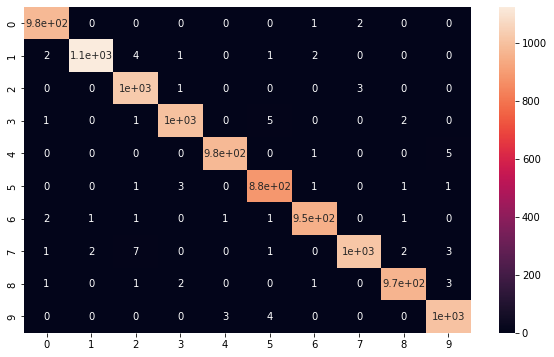

In [45]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.show()

Let's look into some of the misclassified images!

In [47]:
y_test!=predictions

array([False, False, False, ..., False, False, False])

In [50]:
misclassified_images=[i for i,x in enumerate(y_test!=predictions) if x==True]
misclassified_images[:9]

[18, 115, 340, 445, 449, 582, 659, 726, 883]

In [51]:
for a, b in enumerate(misclassified_images[:9]):
  print(a,b)

0 18
1 115
2 340
3 445
4 449
5 582
6 659
7 726
8 883


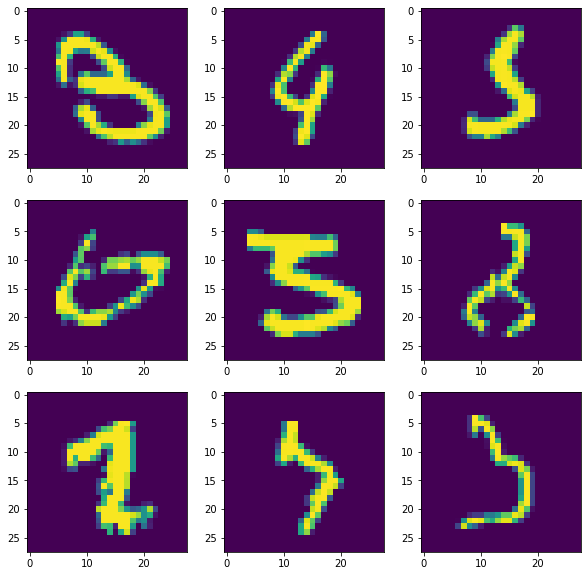

In [53]:
plt.figure(figsize=(10,10))

actuals = []
for i , number in enumerate(misclassified_images[:9]):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(X_test[number].reshape(28,28)) 
  actuals.append(y_test[number])
plt.show() 

In [54]:
actuals

[3, 4, 5, 6, 3, 8, 2, 7, 3]

In [55]:
predictions[misclassified_images[:9]]

array([8, 9, 3, 0, 5, 2, 7, 5, 5])

Done